In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

# Load the dataset
adult = fetch_ucirepo(id=2)
df = adult.data.features
df['income'] = adult.data.targets

# Clean the income column by removing trailing dots
df['income'] = df['income'].str.replace('.', '')

# Basic dataset info
print("=== Dataset Info ===")
print(f"Total records: {len(df)}")
print("\n=== Metadata ===")
print(adult.metadata)
print("\n=== Variable Information ===")
print(adult.variables)

# Split by income group
high_income = df[df['income'] == '>50K']
low_income = df[df['income'] == '<=50K']

print(f"\nHigh income (>50K): {len(high_income)} records")
print(f"Low income (<=50K): {len(low_income)} records")


=== Dataset Info ===
Total records: 48842

=== Metadata ===
{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A

/var/folders/05/r7vm5n517332p2ppkkgb11qr0000gn/T/ipykernel_67348/1687111694.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['income'] = df['income'].str.replace('.', '')


In [8]:
print("\n=== High Income Summary ===")
print(high_income.describe())
print(high_income.info())


=== High Income Summary ===
                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  11687.000000  1.168700e+04   11687.000000  11687.000000  11687.000000   
mean      44.275178  1.884706e+05      11.602807   4042.239497    193.528964   
std       10.558983  1.024427e+05       2.382624  14756.771034    593.211612   
min       19.000000  1.376900e+04       1.000000      0.000000      0.000000   
25%       36.000000  1.189425e+05      10.000000      0.000000      0.000000   
50%       43.000000  1.767290e+05      12.000000      0.000000      0.000000   
75%       51.000000  2.335050e+05      13.000000      0.000000      0.000000   
max       90.000000  1.226583e+06      16.000000  99999.000000   3683.000000   

       hours-per-week  
count    11687.000000  
mean        45.452896  
std         11.091176  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         50.000000  
max         99.000000  
<class 'pandas.core.frame.DataFram

In [9]:
print("\n=== Low Income Summary ===")
print(low_income.describe())
print(low_income.info())


=== Low Income Summary ===
                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  37155.000000  3.715500e+04   37155.000000  37155.000000  37155.000000   
mean      36.872184  1.900396e+05       9.598493    147.010308     54.151931   
std       14.104118  1.065776e+05       2.437673    936.753678    313.320005   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       25.000000  1.172100e+05       9.000000      0.000000      0.000000   
50%       34.000000  1.788110e+05       9.000000      0.000000      0.000000   
75%       46.000000  2.389170e+05      10.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  41310.000000   4356.000000   

       hours-per-week  
count    37155.000000  
mean        38.840048  
std         12.356849  
min          1.000000  
25%         35.000000  
50%         40.000000  
75%         40.000000  
max         99.000000  
<class 'pandas.core.frame.DataFrame

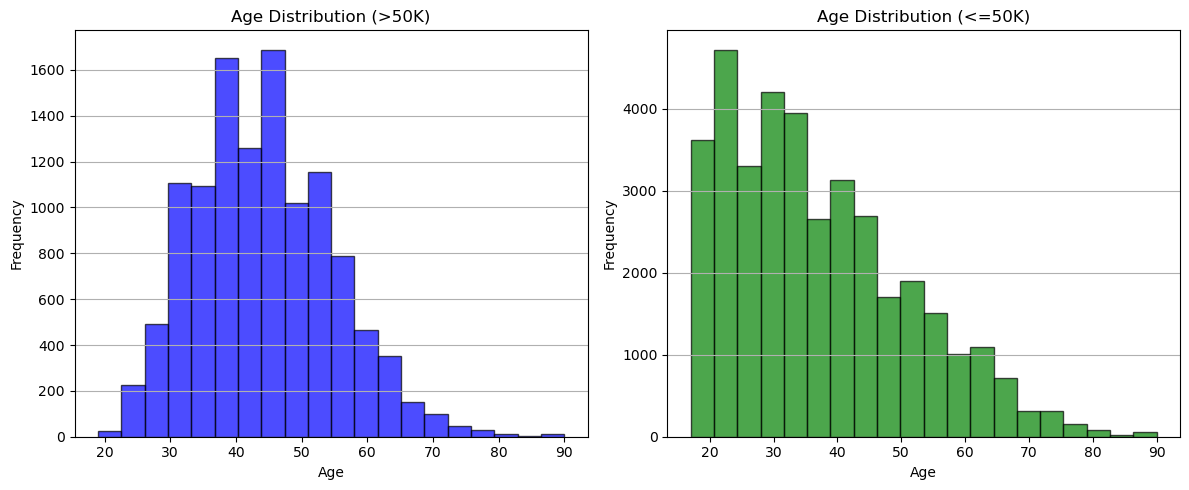

In [10]:
# Age distribution comparison
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].hist(high_income['age'], bins=20, alpha=0.7, color='blue', edgecolor='black')
axs[0].set_title('Age Distribution (>50K)')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Frequency')
axs[0].grid(axis='y')

axs[1].hist(low_income['age'], bins=20, alpha=0.7, color='green', edgecolor='black')
axs[1].set_title('Age Distribution (<=50K)')
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Frequency')
axs[1].grid(axis='y')

plt.tight_layout()
plt.show()

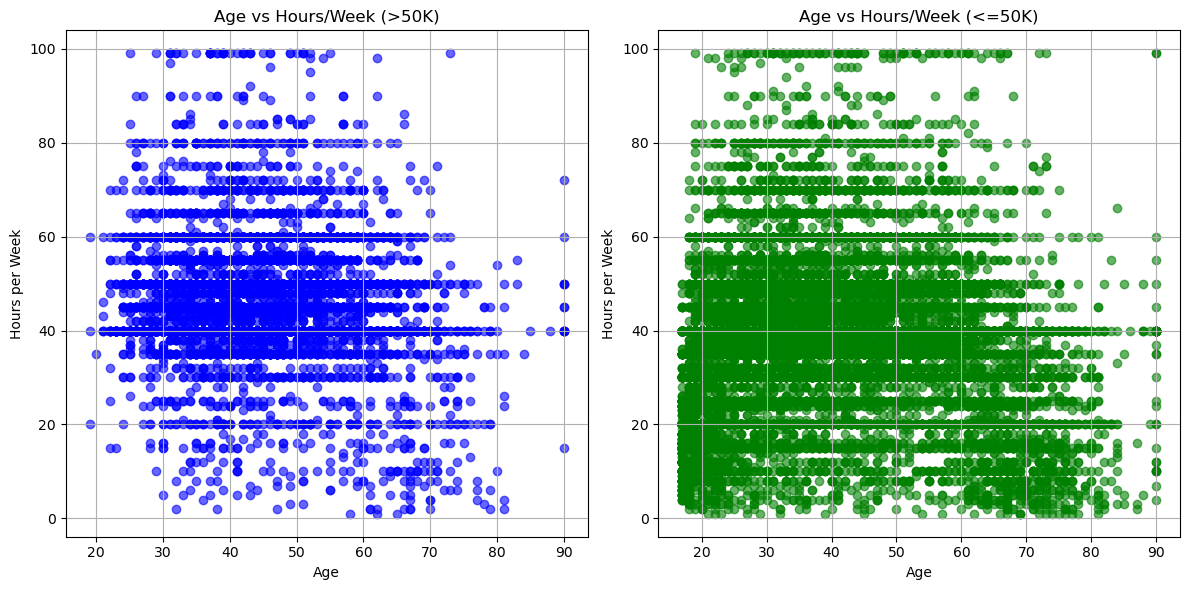

In [11]:
# Age vs Hours per week
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(high_income['age'], high_income['hours-per-week'], alpha=0.6, color='blue')
plt.title('Age vs Hours/Week (>50K)')
plt.xlabel('Age')
plt.ylabel('Hours per Week')
plt.grid()

plt.subplot(1, 2, 2)
plt.scatter(low_income['age'], low_income['hours-per-week'], alpha=0.6, color='green')
plt.title('Age vs Hours/Week (<=50K)')
plt.xlabel('Age')
plt.ylabel('Hours per Week')
plt.grid()

plt.tight_layout()
plt.show()

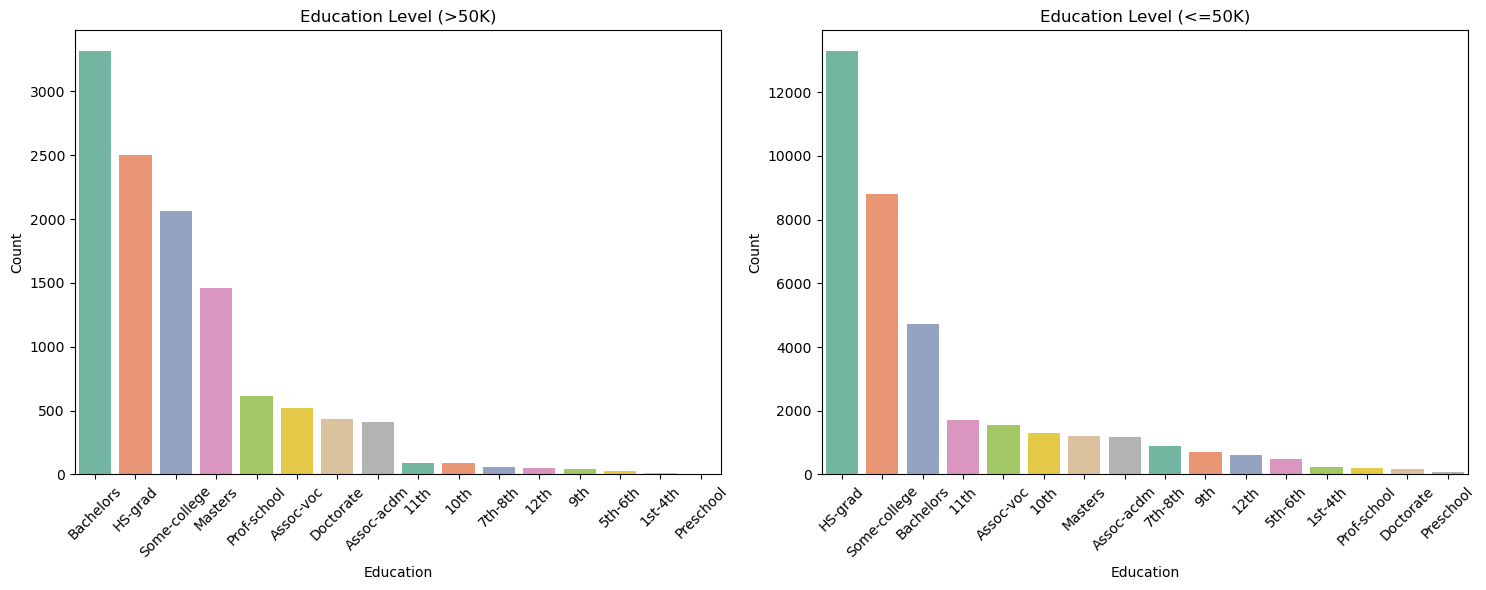

In [12]:
# Education level comparison
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

sns.countplot(x='education', data=high_income, ax=axs[0], palette='Set2', order=high_income['education'].value_counts().index)
axs[0].set_title('Education Level (>50K)')
axs[0].set_xlabel('Education')
axs[0].set_ylabel('Count')
axs[0].tick_params(axis='x', rotation=45)

sns.countplot(x='education', data=low_income, ax=axs[1], palette='Set2', order=low_income['education'].value_counts().index)
axs[1].set_title('Education Level (<=50K)')
axs[1].set_xlabel('Education')
axs[1].set_ylabel('Count')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

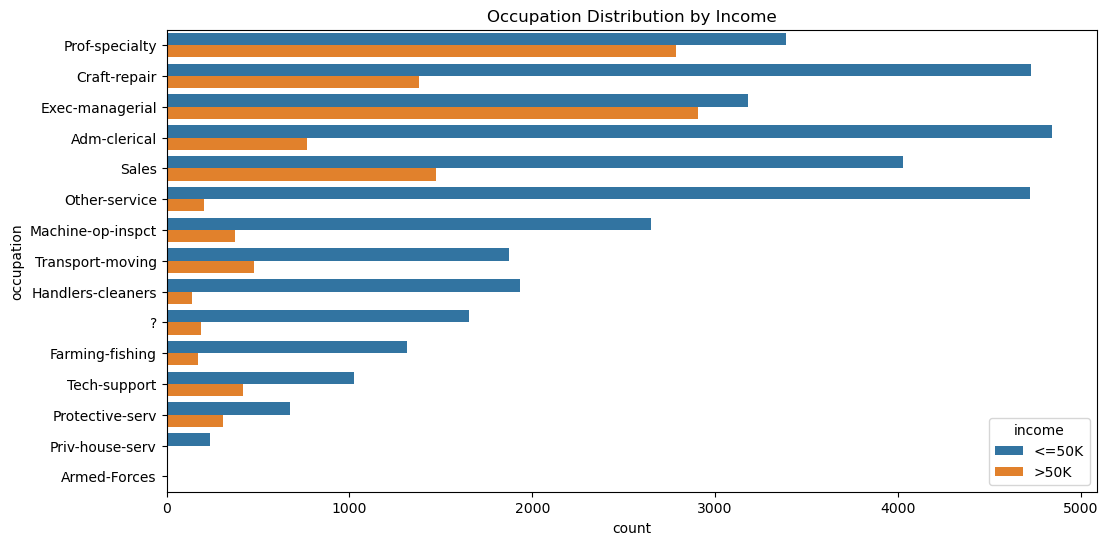

In [15]:
# Occupation distribution
plt.figure(figsize=(12, 6))
sns.countplot(y='occupation', hue='income', data=df, order=df['occupation'].value_counts().index)
plt.title('Occupation Distribution by Income')
plt.show()

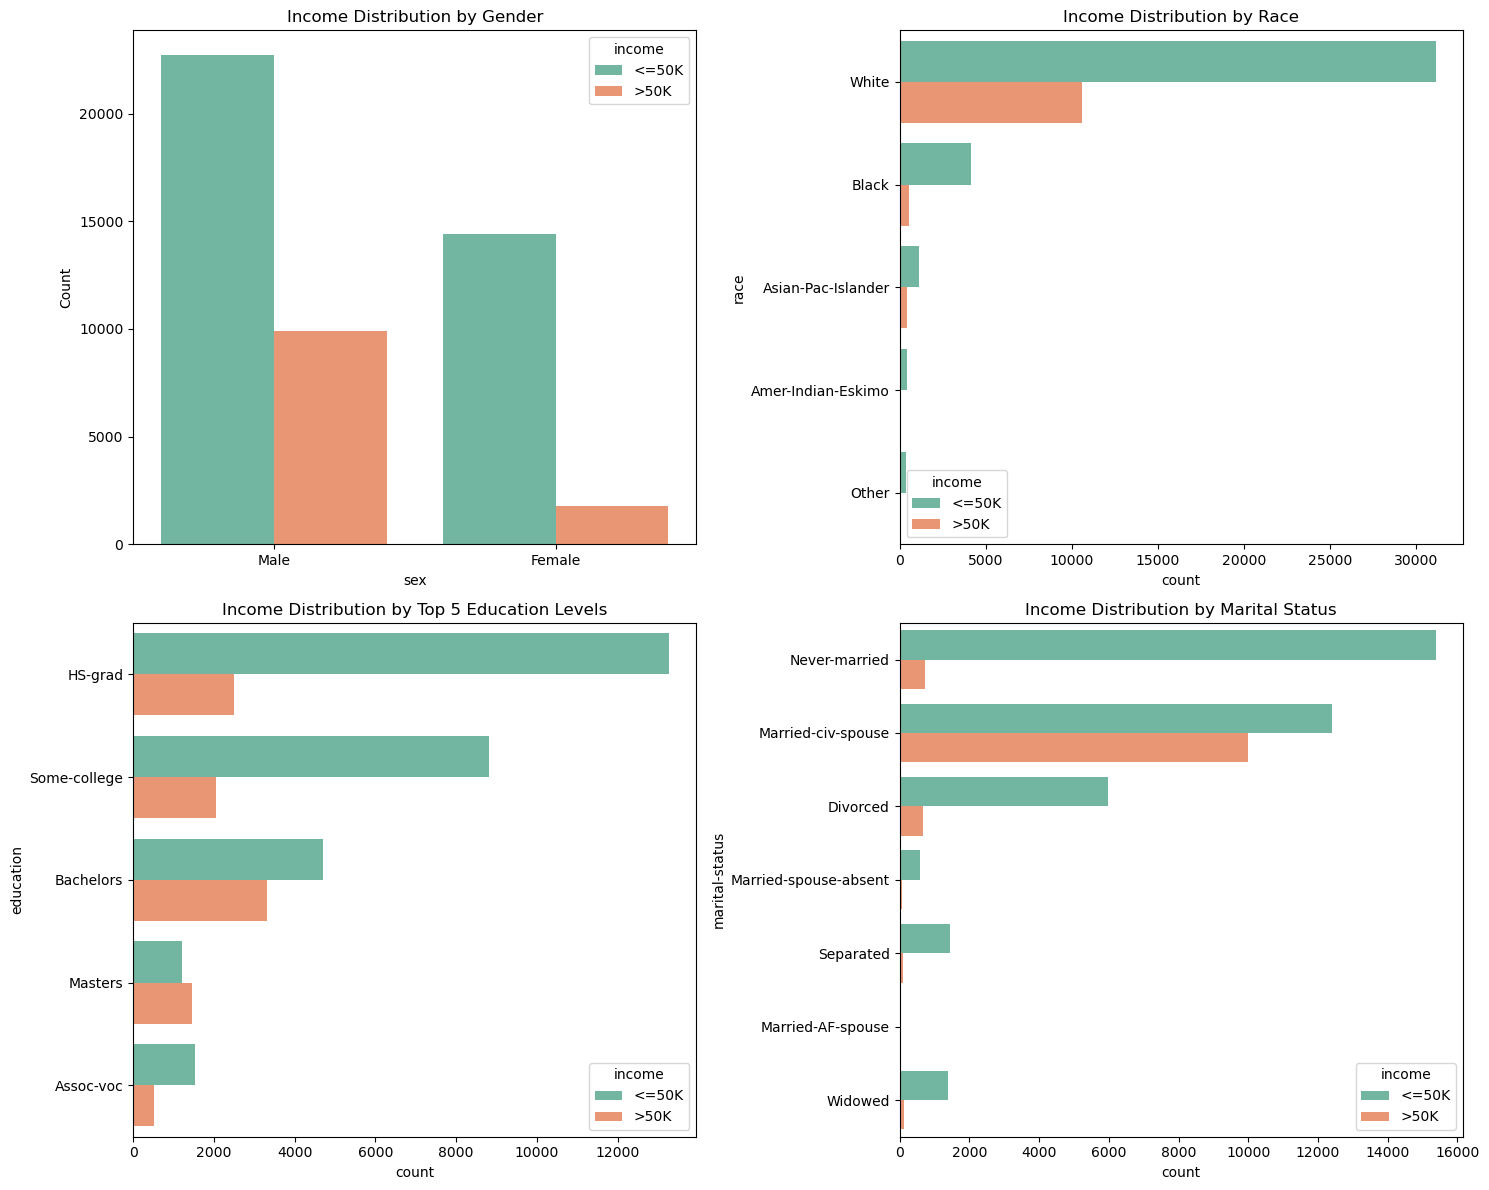

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
# Income Distribution by Key Demographics

# Gender
sns.countplot(x='sex', hue='income', data=df, ax=axs[0,0], palette='Set2')
axs[0,0].set_title('Income Distribution by Gender')
axs[0,0].set_ylabel('Count')

# Race
sns.countplot(y='race', hue='income', data=df, ax=axs[0,1], palette='Set2')
axs[0,1].set_title('Income Distribution by Race')

# Education
top_educ = df['education'].value_counts().nlargest(5).index
sns.countplot(y='education', hue='income', data=df[df['education'].isin(top_educ)], 
              ax=axs[1,0], palette='Set2', order=top_educ)
axs[1,0].set_title('Income Distribution by Top 5 Education Levels')

# Marital Status
sns.countplot(y='marital-status', hue='income', data=df, ax=axs[1,1], palette='Set2')
axs[1,1].set_title('Income Distribution by Marital Status')

plt.tight_layout()
plt.show()

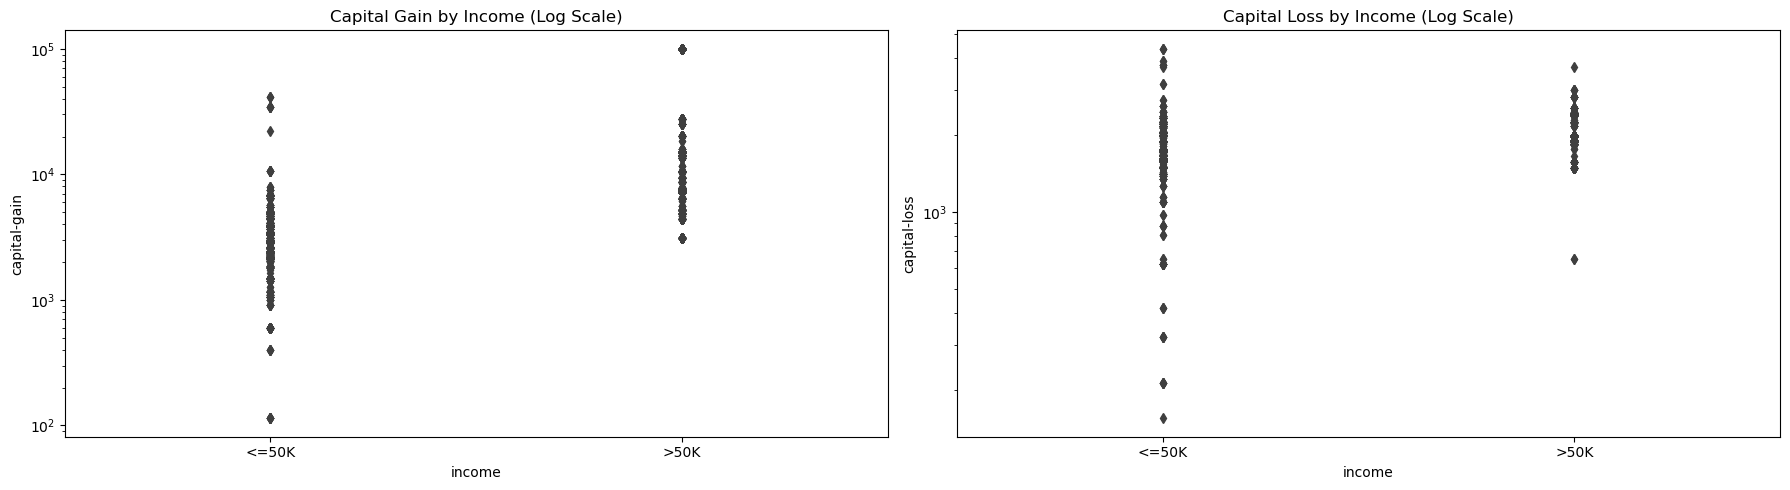

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(18, 5))

# Capital Gain/Loss Distribution
sns.boxplot(x='income', y='capital-gain', data=df, ax=axs[0])
axs[0].set_yscale('log')
axs[0].set_title('Capital Gain by Income (Log Scale)')

sns.boxplot(x='income', y='capital-loss', data=df, ax=axs[1])
axs[1].set_yscale('log')
axs[1].set_title('Capital Loss by Income (Log Scale)')

plt.tight_layout()
plt.show()

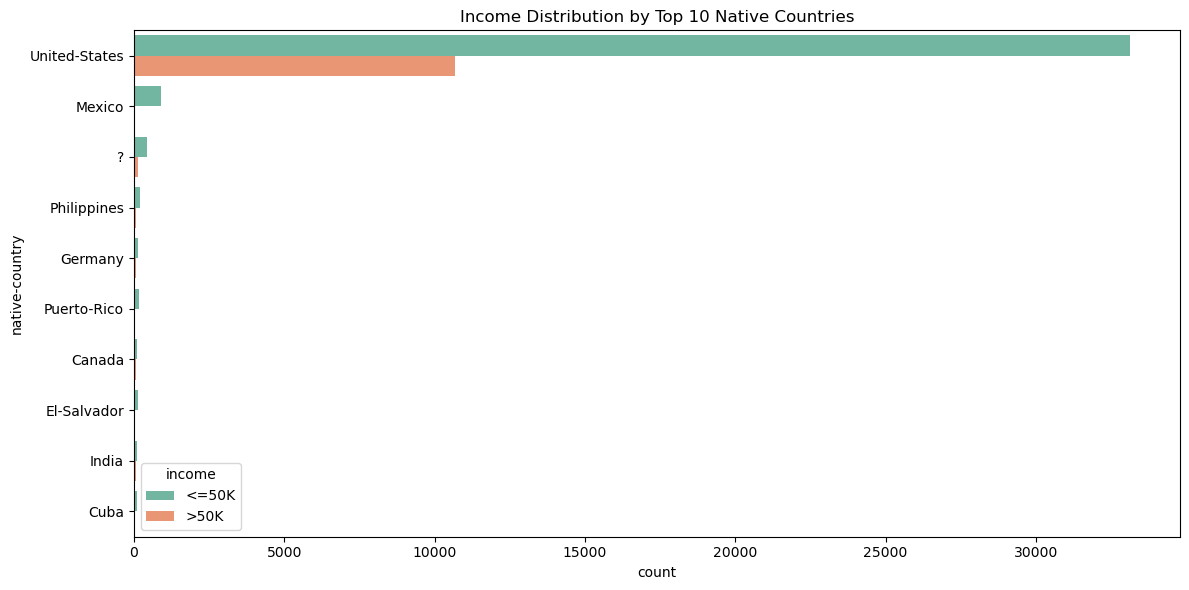

In [23]:
plt.figure(figsize=(12, 6))
top_countries = df['native-country'].value_counts().nlargest(10).index
sns.countplot(y='native-country', hue='income', data=df[df['native-country'].isin(top_countries)], 
             order=top_countries, palette='Set2')
plt.title('Income Distribution by Top 10 Native Countries')
plt.tight_layout()
plt.show()

# Hypothesis Formulation

Based on the bar plot above, I formulated the following hypotheses

### Hypothesis 1: Education Level and Income
- Higher education levels are associated with higher likelihood of earning >$50K.

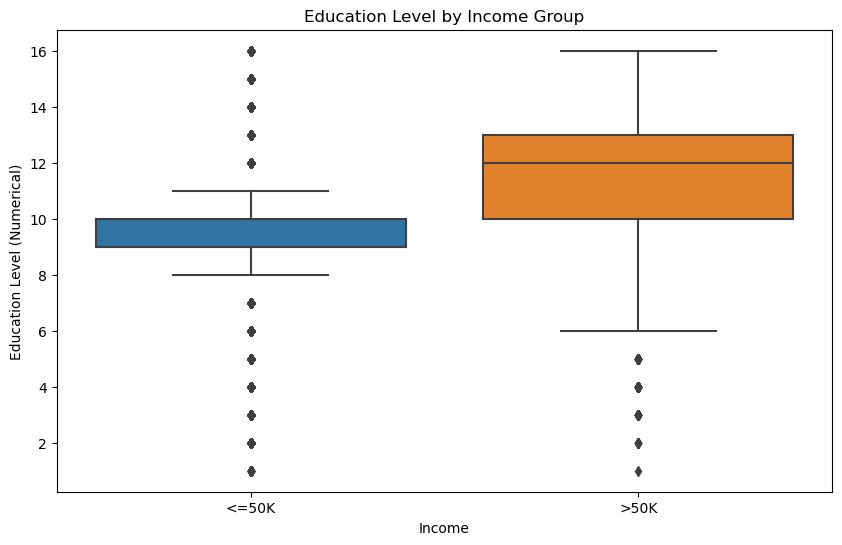

Spearman Correlation: 0.328, p-value: 0.0000
T-test: t=63.44, p=0.0000


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, ttest_ind

# Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='education-num', data=df)
plt.title('Education Level by Income Group')
plt.xlabel('Income')
plt.ylabel('Education Level (Numerical)')
plt.show()

# Statistical Tests
# Spearman correlation
df['income_num'] = df['income'].map({'<=50K': 0, '>50K': 1})
corr, p_val = spearmanr(df['education-num'], df['income_num'])
print(f'Spearman Correlation: {corr:.3f}, p-value: {p_val:.4f}')

# T-test
low_ed = df[df['education-num'] <= df['education-num'].median()]['income_num']
high_ed = df[df['education-num'] > df['education-num'].median()]['income_num']
t_stat, p_val = ttest_ind(high_ed, low_ed, equal_var=False)
print(f'T-test: t={t_stat:.2f}, p={p_val:.4f}')

### Results and Analysis of Hypothesis Test 1
#### Hypotheses
- Null Hypothesis (H0): There is no relationship between education level and income.
    - The Spearman correlation coefficient between education level and income is zero.
    - The average education level for individuals earning ≤50K is equal to that of those earning >50K.

- Alternative Hypothesis (HA): Higher education levels are associated with higher income.
    - The Spearman correlation coefficient is positive.
    - The average education level for individuals earning >50K is higher than for those earning ≤50K.

#### Results
- Boxplot
    - Clear separation in education levels (education-num) between income groups.
    - The median education level for >50K earners (≈13, "Bachelors") is significantly higher than for ≤50K earners (≈10, "High School").

- Spearman Correlation: 0.328
    - Indicates a moderate positive correlation between education level and income.
    - As education level increases, the likelihood of earning >50K tends to increase.

- Spearman p-value: 0.0000
    -   Far below the alpha level of 0.05, rejecting H0.

- Independent T-test: 63.44
    - Extremely large (critical value ≈ ±2 for 95% confidence), placing it deep in the rejection region.

- T-test p-value: 0.0000
    - Confirms statistically significant differences in education levels between income groups.

#### Hypothesis 1 Conclusion
- Reject H0: Both tests provide overwhelming evidence against the null hypothesis.

- Support HA: Moderate positive correlation (ρ = 0.328, p < 0.001): Higher education predicts higher income. Large group difference (t = 63.44, p < 0.001): >50K earners have substantially higher education levels.

#### Key Takeaway:
Education is a strong determinant of income in this dataset. Policies aimed at increasing educational attainment could significantly impact earning potential.

### Hypothesis 2: Work Hours and Income
- Individuals working more hours per week are more likely to earn >$50K.

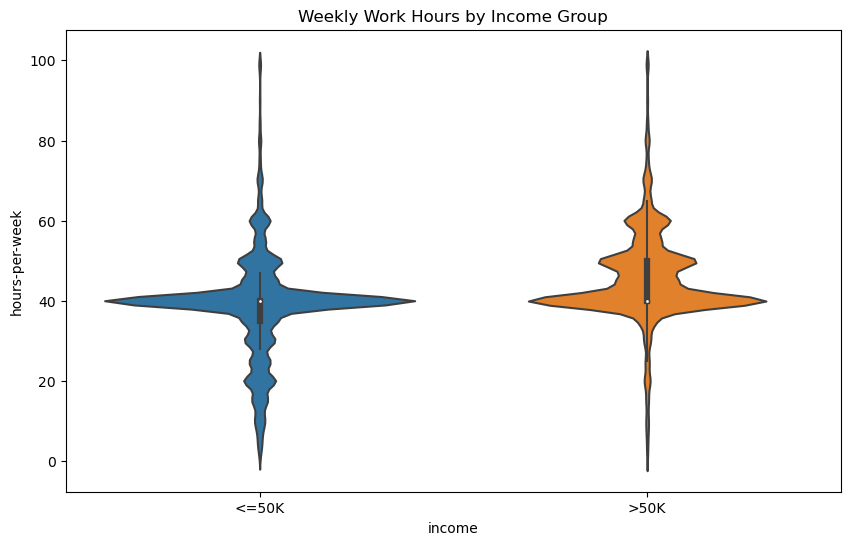

Point-biserial Correlation: 0.228, p-value: 0.0000
Mann-Whitney U: stat=291741763.0, p=0.0000


In [25]:
# Visualization
plt.figure(figsize=(10, 6))
sns.violinplot(x='income', y='hours-per-week', data=df)
plt.title('Weekly Work Hours by Income Group')
plt.show()

# Statistical Tests
# Point-biserial correlation (equivalent to Pearson for binary-continuous)
from scipy.stats import pointbiserialr
corr, p_val = pointbiserialr(df['hours-per-week'], df['income_num'])
print(f'Point-biserial Correlation: {corr:.3f}, p-value: {p_val:.4f}')

# Mann-Whitney U test (non-parametric)
from scipy.stats import mannwhitneyu
stat, p_val = mannwhitneyu(df[df['income']=='>50K']['hours-per-week'],
                          df[df['income']=='<=50K']['hours-per-week'])
print(f'Mann-Whitney U: stat={stat:.1f}, p={p_val:.4f}')

### Results and Analysis of Hypothesis Test 2: Work Hours and Income
#### Hypotheses
- Null Hypothesis (H₀):
    - There is no relationship between weekly work hours and income.
    - The average work hours for individuals earning ≤50K are equal to those earning >50K.

- Alternative Hypothesis (Hₐ):
    - Individuals working more hours per week are more likely to earn >50K.
    - The average work hours for >50K earners are higher than for ≤50K earners.

#### Results
- Violin Plot
    - The >50K group (right) shows a rightward shift in work hours compared to ≤50K (left).
    - The median for >50K (~45 hours) is higher than for ≤50K (~40 hours).

- Key Insight:
    - High-income earners tend to work longer hours, though both groups show similar variability.

- Point-Biserial Correlation: Coefficient (rₚₑ) = 0.228
    - Indicates a small but significant positive correlation between work hours and income.
    - Interpretation: More work hours → Slightly higher chance of earning >50K.

- p-value = 0.0000
    - Far below α = 0.05 → Reject H₀.

- Mann-Whitney U Test
    - U-statistic = 291,741,763.0
    - Non-parametric test confirms the >50K group has higher ranked work hours.

- p-value = 0.0000
    - Extremely significant → Reject H₀.

#### Hypothesis 2 Conclusion
- Reject H₀: Both tests provide strong evidence that higher work hours correlate with higher income.
- Support Hₐ:
    - Modest but clear relationship (rₚₑ = 0.228, p < 0.001).
    - 50K earners work ~5 more hours/week on average (median difference).

#### Key Takeaway:
While work hours are not the sole predictor of income (effect size is small), they are statistically significant. Other factors (e.g., occupation, education) likely interact with hours worked.

